In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime
plt.rcParams['figure.figsize'] = [25,15]

In [2]:

def get_month(date):
    date=date.split("-")
    if date[1]=="01":
        return "January"+date[0]
    if date[1]=="02":
        return "February"+date[0]
    if date[1]=="03":
        return "March"+date[0]
    if date[1]=="04":
        return "April"+date[0]
    if date[1]=="05":
        return "May"+date[0]
    if date[1]=="06":
        return "June"+date[0]
    if date[1]=="07":
        return "July"+date[0]
    if date[1]=="08":
        return "August"+date[0]
    if date[1]=="09":
        return "September"+date[0]
    if date[1]=="10":
        return "October"+date[0]
    if date[1]=="11":
        return "November"+date[0]
    if date[1]=="12":
        return "December"+date[0]
    
    
def get_year(date):
    date=date.split("-")
    return date[0]
def Histogram(x,y,xlabel,ylabel,title):
    x.plot(kind="hist",
        alpha=0.7,
        #         bins=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000],
        title=title,
        figsize=(12,8),
        color=["red"],rwidth=0.8
       )
    y.plot(kind="hist",
        alpha=0.7,
        #         bins=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000],
        title=title,
        figsize=(12,8),
        color=["blue"],rwidth=0.8
       )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def bar_graph(categories,cat_val,xlabel,ylabel,title=""):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(categories,cat_val,width=0.8)
    plt.title(title)
    plt.show()
# This is the code of linear_regression model also.........           
def linear_correlation(x,y):
    meanx=sum(x.values)/len(x)
    meany=sum(y.values)/len(y)
    if len(x.values)==len(y.values):
        num,den=0,0
        #numerator calculation
        a=0
        for i in range(len(x)):
            a+=x.values[i]*y.values[i]
            #         print(a)
        num=a*len(x)-(sum(x.values)*sum(y.values))
    
        #denominator calculation
        ax,ay=0,0
        for i in range(len(x)):
                ax+=x.values[i]**2
                ay+=y.values[i]**2 
        p1=(len(x)*ax-(sum(x.values)**2))**0.5
        p2=(len(y)*ay-(sum(y.values)**2))**0.5
        den=p1*p2
        #print(num,den)
        return num/den
    else:
        raise Exception("Invalid Dimension")
import datetime
import calendar
 
def get_day(date):
    day, month, year = (int(i) for i in date.split('-'))   
    dayNumber = calendar.weekday(year, month, day)
    days =["Monday", "Tuesday", "Wednesday", "Thursday",
                         "Friday", "Saturday", "Sunday"]
    return (days[dayNumber])

def set_index(x):
    if x=="June2020":
        return -2
    if x=="July2020":
        return -1
    if x=="August2020":
        return 0
    if x=="September2020":
        return 1
    if x=="October2020":
        return 2
    if x=="November2020":
        return 3
    if x=="December2020":
        return 4
    if x=="January2021":
        return 5
    if x=="February2021":
        return 6
    if x=="March2021":
        return 7
    if x=="April2021":
        return 8
    if x=="May2021":
        return 9
    if x=="June2021":
        return 10
    if x=="July2021":
        return 11
    if x=="August2021":
        return 12
    if x=="September2021":
        return 13
    if x=="October2021":
        return 14
    if x=="November2021":
        return 15
    if x=="December2021":
        return 16
    if x=="January2022":
        return 17
def piechart(categories,cat_val,title=""):
    labels=categories
    values=cat_val
    #     explode = (0,0.1)
    plt.pie(values,labels=values,counterclock=False,autopct="%.2f", shadow=True)
    plt.title(title)
    plt.legend(labels,loc=3)
    plt.rcParams['figure.figsize'] = [10,50]
    plt.show()
def rearrange_date(x):
    arr=x.split("-")
    s="-"
    s1=s.join(arr[::-1])
    return s1
# vacc_month_sum[["vax_total_24h","vax_first_dose_24h","vax_sec_dose_24h"]].plot(kind="bar")
def plot_bar_graphs(data,values,xlabel="",ylabel="",title=""):
    data[values].plot(kind="bar",title="",xlabel=xlabel,ylabel=ylabel)
def waves(date):
    date = date.split('-')
    if date[0] == '2020':
        return 'first'
    elif date[0] == '2021':
        if (date[1] == '01' or date[1] == '02' or date[1] == '03'):
            return 'first'
        else:
            return 'second'
    elif date[0] == '2022':
        return 'third'
def order_by_date(date):
    date=date.split("-")
    s=""
    for i in range(len(date)-1,-1,-1):
        s=s+date[i]

    return int(s)


# PART-1: VARIANTS,COVID-WAVES AND ITS POTENTIAL CAUSES:

In [3]:
district_cases = pd.read_csv("PB_district_cases.csv")
# district_cases

In [4]:
pb_cases = pd.read_csv("PB_cases.csv")
pb_cases["month"]=pb_cases["date"].copy()
pb_cases["year"]=pb_cases["date"].copy()
pb_cases["month"]=pb_cases["month"].apply(lambda x:get_month(x))
pb_cases["year"]=pb_cases["year"].apply(lambda x:get_year(x))

In [5]:
t = pb_cases[['date','tests_new']]
pb_cases_tests  = t.copy()
# pb_cases_tests

In [6]:
punjab= pd.merge(district_cases, pb_cases_tests, on='date')
punjab.drop(columns=['outside_source_details','case_details'],inplace=True)
# punjab

In [7]:
pb_cases['rise in cases']= ""
pb_cases['rise in cases'] = punjab['active_cases'].diff()
pb_cases.dropna(subset=['rise in cases'],inplace=True)
pb_cases.reset_index(inplace=True)
pb_cases.drop(columns=['index'],inplace=True)
# pb_cases

In [8]:
punjab["month"]=punjab["date"].copy()
punjab["year"]=punjab["date"].copy()
punjab["month"]=punjab["month"].apply(lambda x:get_month(x))
punjab["year"]=punjab["year"].apply(lambda x:get_year(x))
punjab['rise in cases']= ""
punjab['rise in cases'] = punjab['active_cases'].diff()
punjab.dropna(subset=['rise in cases'],inplace=True)
punjab.reset_index(inplace=True)
punjab.drop(columns=['index'],inplace=True)
# punjab

In [9]:
punjab_cases_mean=punjab.groupby(["month"]).mean()
# punjab_cases_mean

In [10]:
punjab_cases_mean["Index"]=punjab_cases_mean.index.values.copy()
punjab_cases_mean["Index"]=punjab_cases_mean["Index"].apply(lambda x:set_index(x))
punjab_cases_mean.sort_values(["Index"],inplace=True)
# punjab_cases_mean

**Graph1 and Graph2 below**.

DESCRIPTION:The graphw below are showing average **number of positve cases** per month 

1)Bar-graph
2)Ogive curve

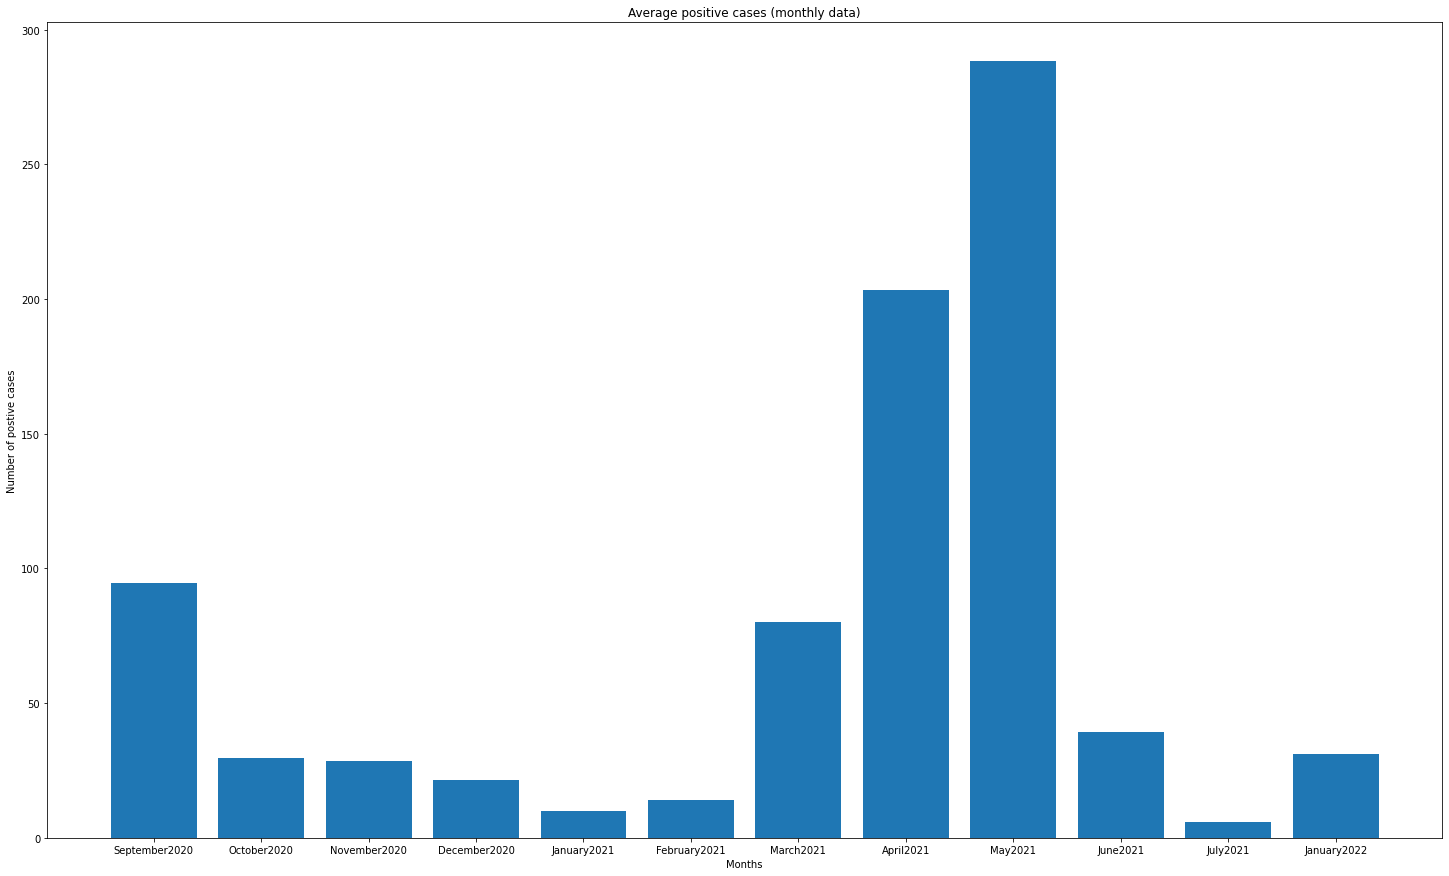

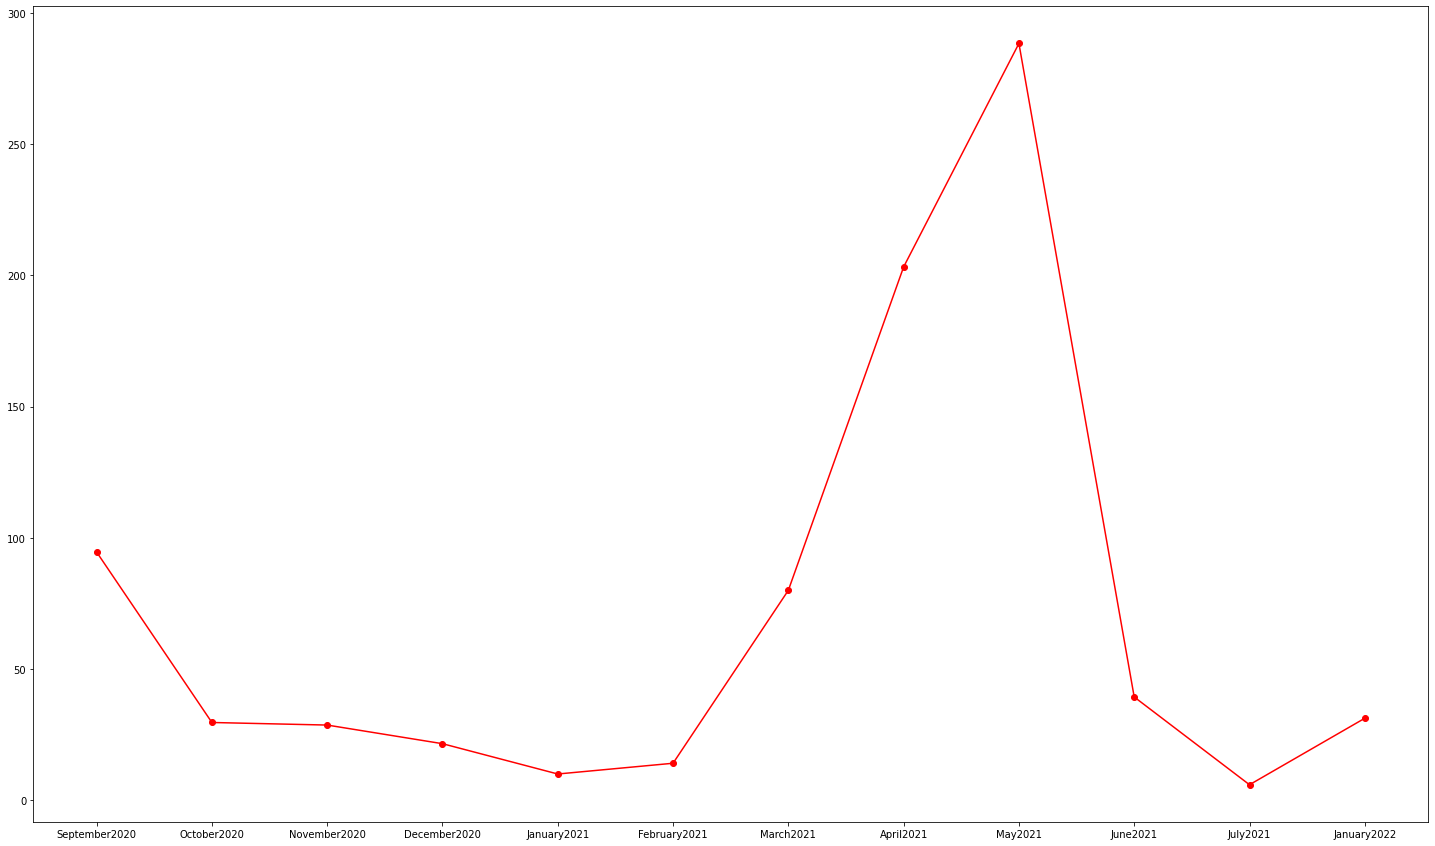

In [11]:
bar_graph(punjab_cases_mean.index.values,punjab_cases_mean["cases_today"],"Months","Number of postive cases","Average positive cases (monthly data)")
plt.plot(punjab_cases_mean.index.values,punjab_cases_mean["cases_today"].values,color='red', marker='o', linestyle='-')

**Graph3 below**.

DESCRPTION: The graph below is showing "Average number of positive cases" V/S "Average tests conducted"

<AxesSubplot:xlabel='month'>

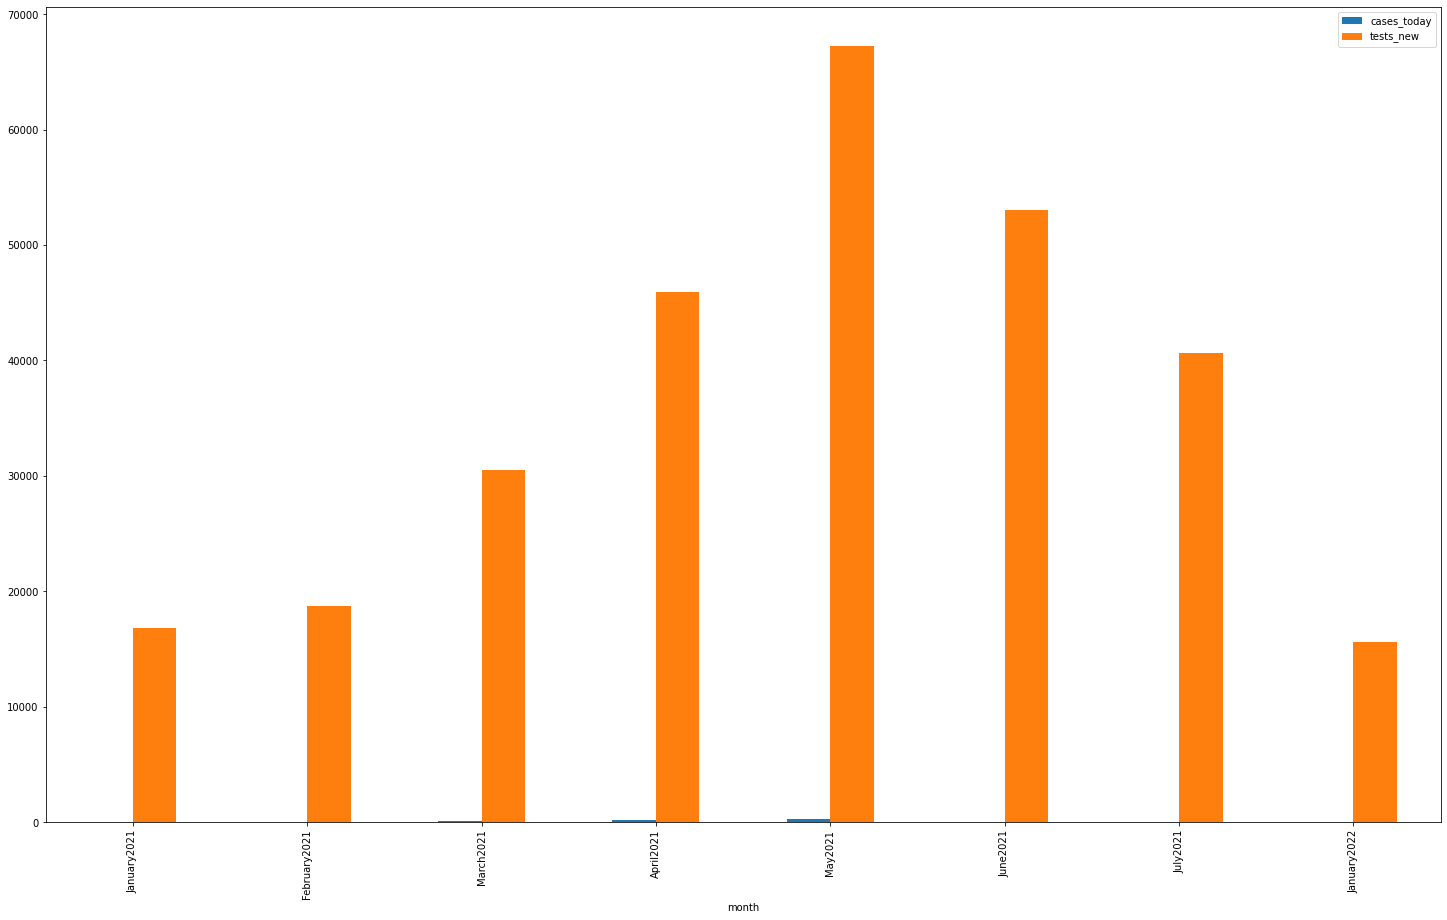

In [12]:
p = punjab_cases_mean.dropna(subset=['tests_new'])
p[["cases_today","tests_new"]].plot(kind="bar")

**Graph5 below**.

DESCRIPTION: The graphs below are showing average deaths registered per month
    
1)Ogive curve

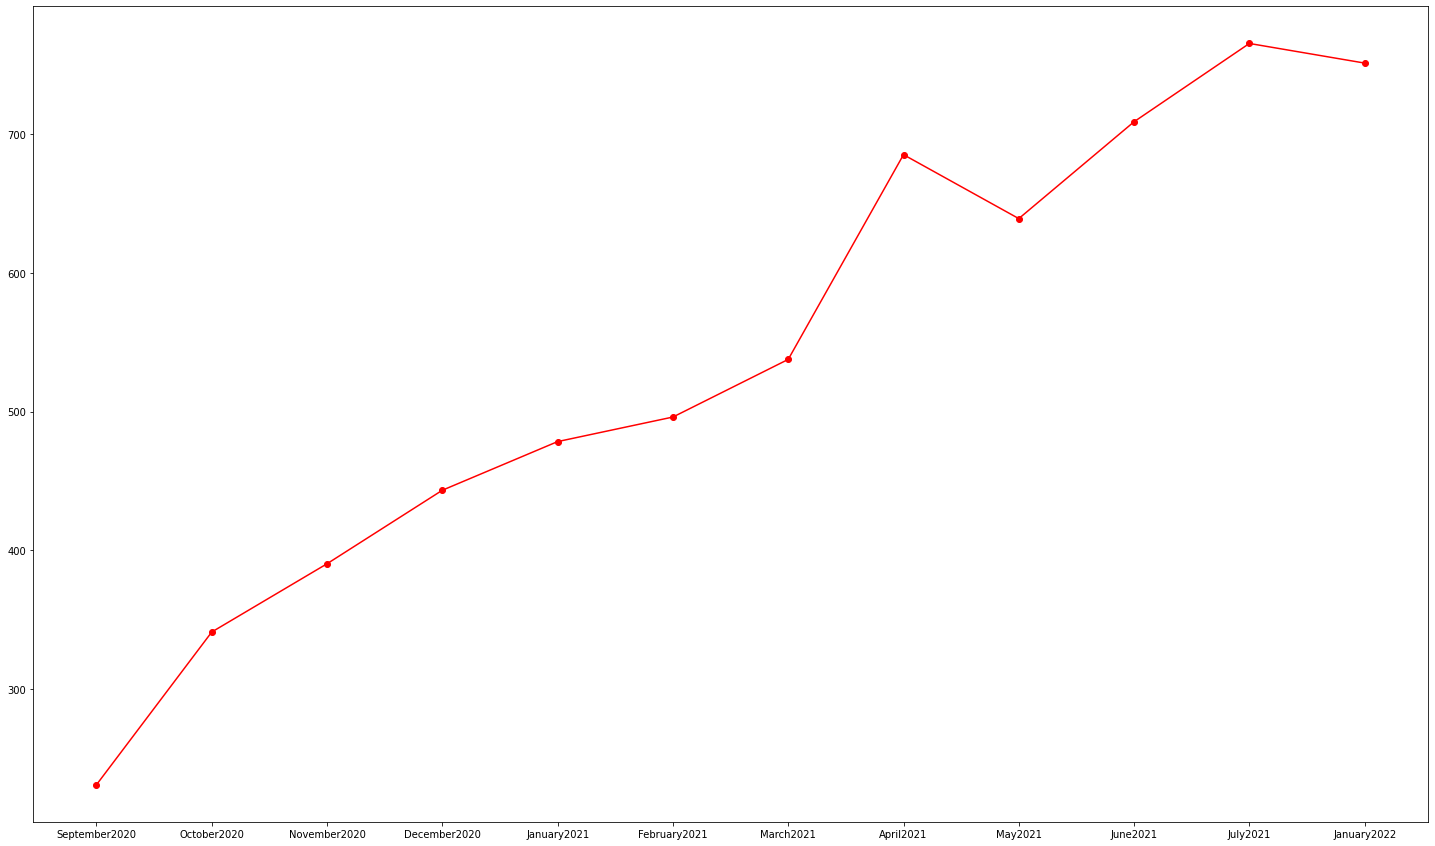

In [13]:
# bar_graph(punjab_cases_mean.index.values,punjab_cases_mean["deaths_total"],"Months","Number of deaths registered","Average deaths (monthly data)")
plt.plot(punjab_cases_mean.index.values,punjab_cases_mean["deaths_total"].values,color='red', marker='o', linestyle='-')

IMPORTING VACCINATION DETAILS:

In [14]:
vaccines = pb_cases[['date','healthcare_first_vaccination_today','frontline_first_vaccination_today','healthcare_second_vaccination_today','frontline_second_vaccination_today','above_45_first_vaccination_today','above_45_second_vaccination_today','eighteen_44_first_vaccination_today','eighteen_44_second_vaccination_today']].copy()
vaccines.dropna(subset=["healthcare_second_vaccination_today"],inplace=True)
# vaccines.drop([363,364,365,366,367],inplace=True)
vaccines.sort_values(by='date', ascending=True,inplace=True)

**Graph6,Graph7 and Graph8 below**

DESCRIPTION OF THE GRAPH:The graph below is showing the **vaccination rate** .
**Graph6 -> Health workers** , 
**Graph7 -> age>45** , 
**Graph8 -> age between 18 to 44** respectively.

PROPERTIES OF GRAPH:
1. If the graph is going up -> means that vaccinations rate is increasing.
2. If the graph is flat -> which means that number of vaccinations are neither increasing nor decreasing that is remaining constant.
3. If the graph is going down -> means that vaccinations rate is decreasing.

<AxesSubplot:title={'center':'Daily Vaccination Rate of Healthcare Workers'}, xlabel='date'>

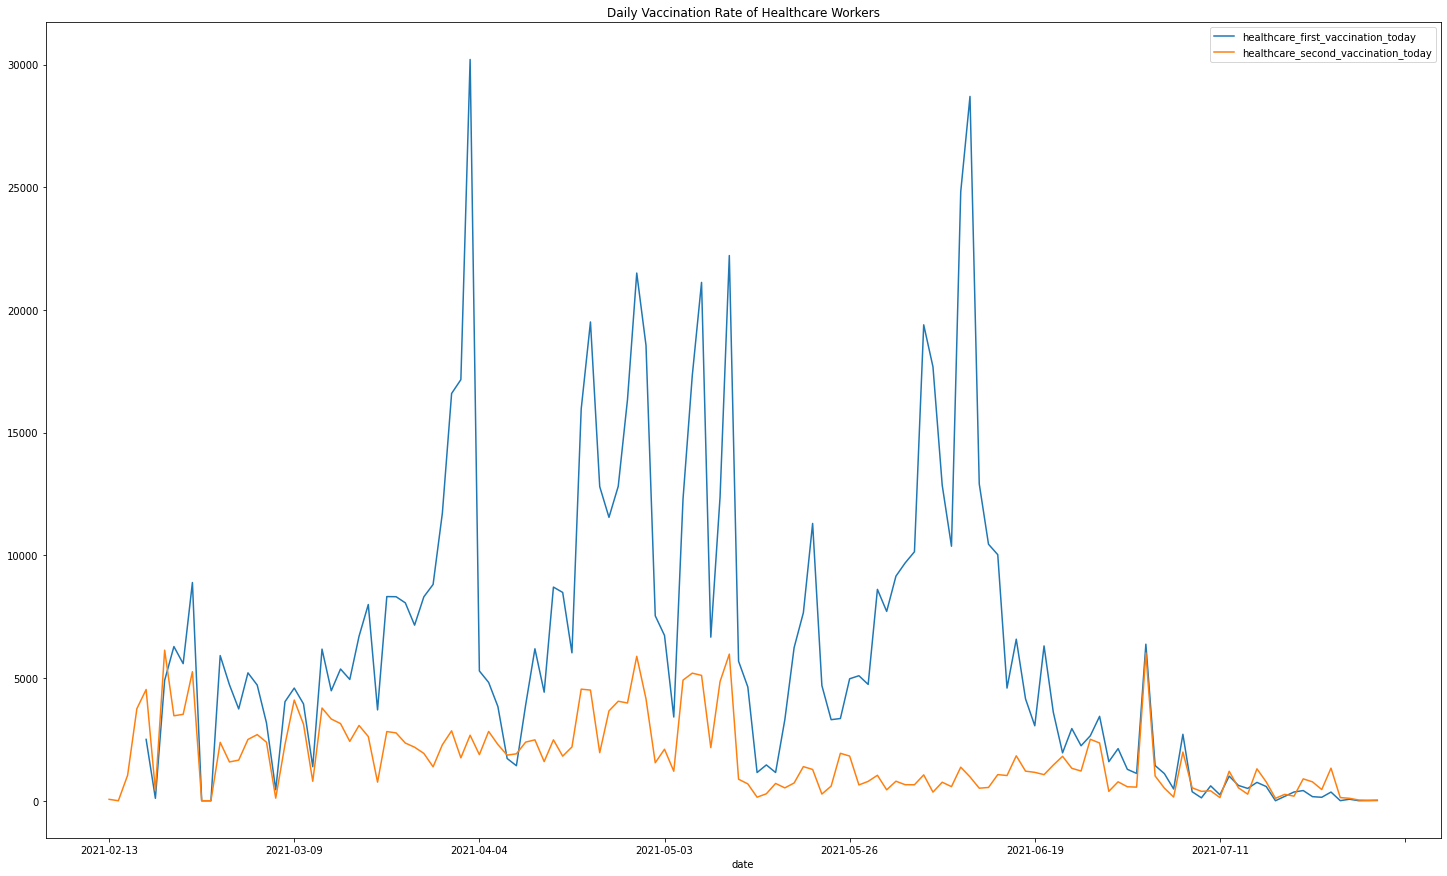

In [15]:
# vaccinations using available data
vaccines.plot(x="date",y=['healthcare_first_vaccination_today','healthcare_second_vaccination_today'],title="Daily Vaccination Rate of Healthcare Workers")

<AxesSubplot:title={'center':'Daily Vaccination Rate of age>45'}, xlabel='date'>

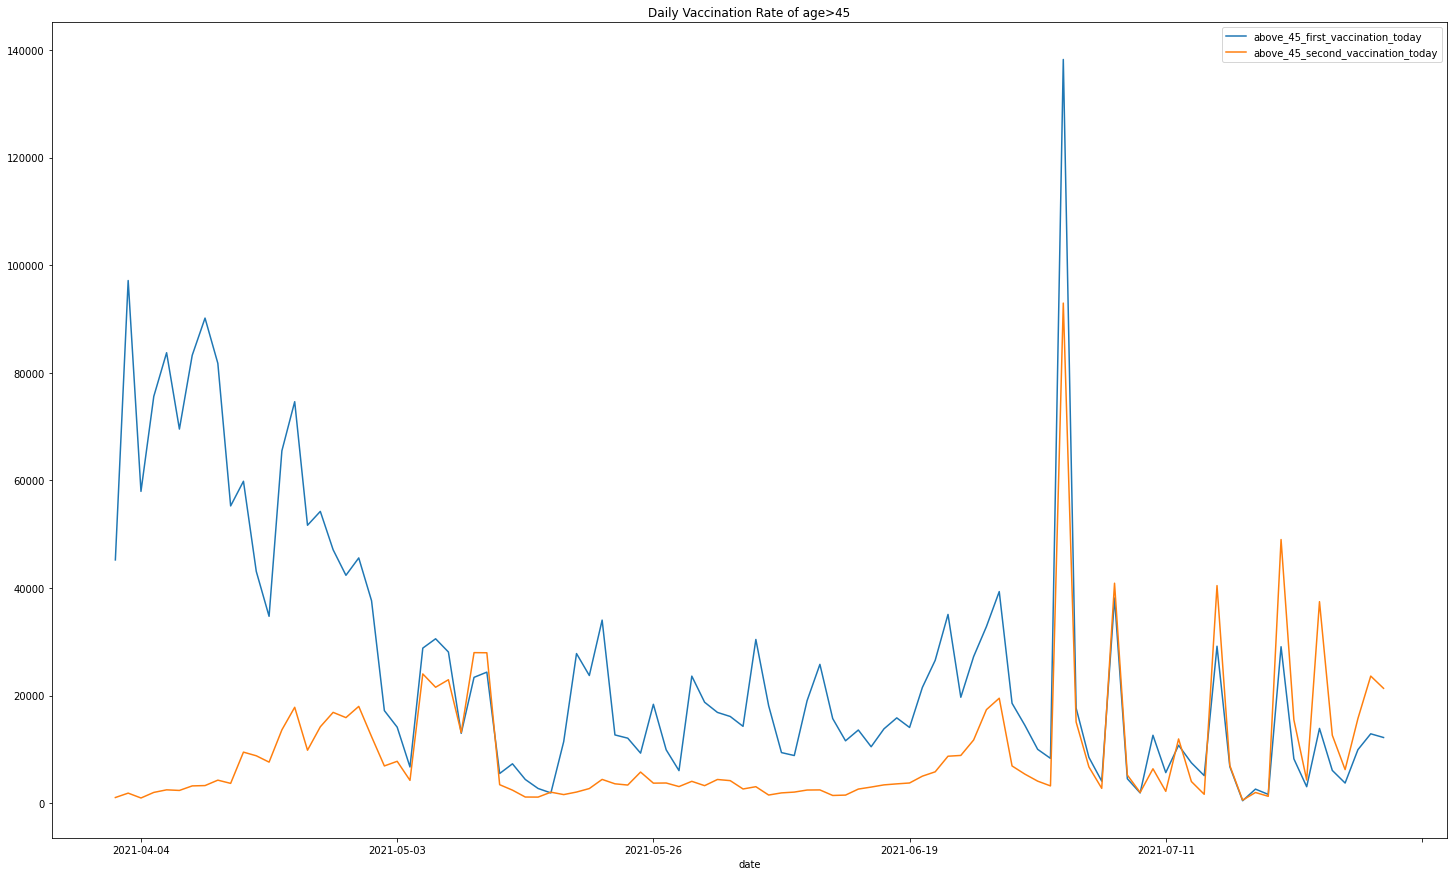

In [16]:
# vaccinations using available data
vaccines.plot(x="date",y=['above_45_first_vaccination_today','above_45_second_vaccination_today'],title="Daily Vaccination Rate of age>45")

<AxesSubplot:title={'center':'Daily Vaccination Rate of age of 18 to 44'}, xlabel='date'>

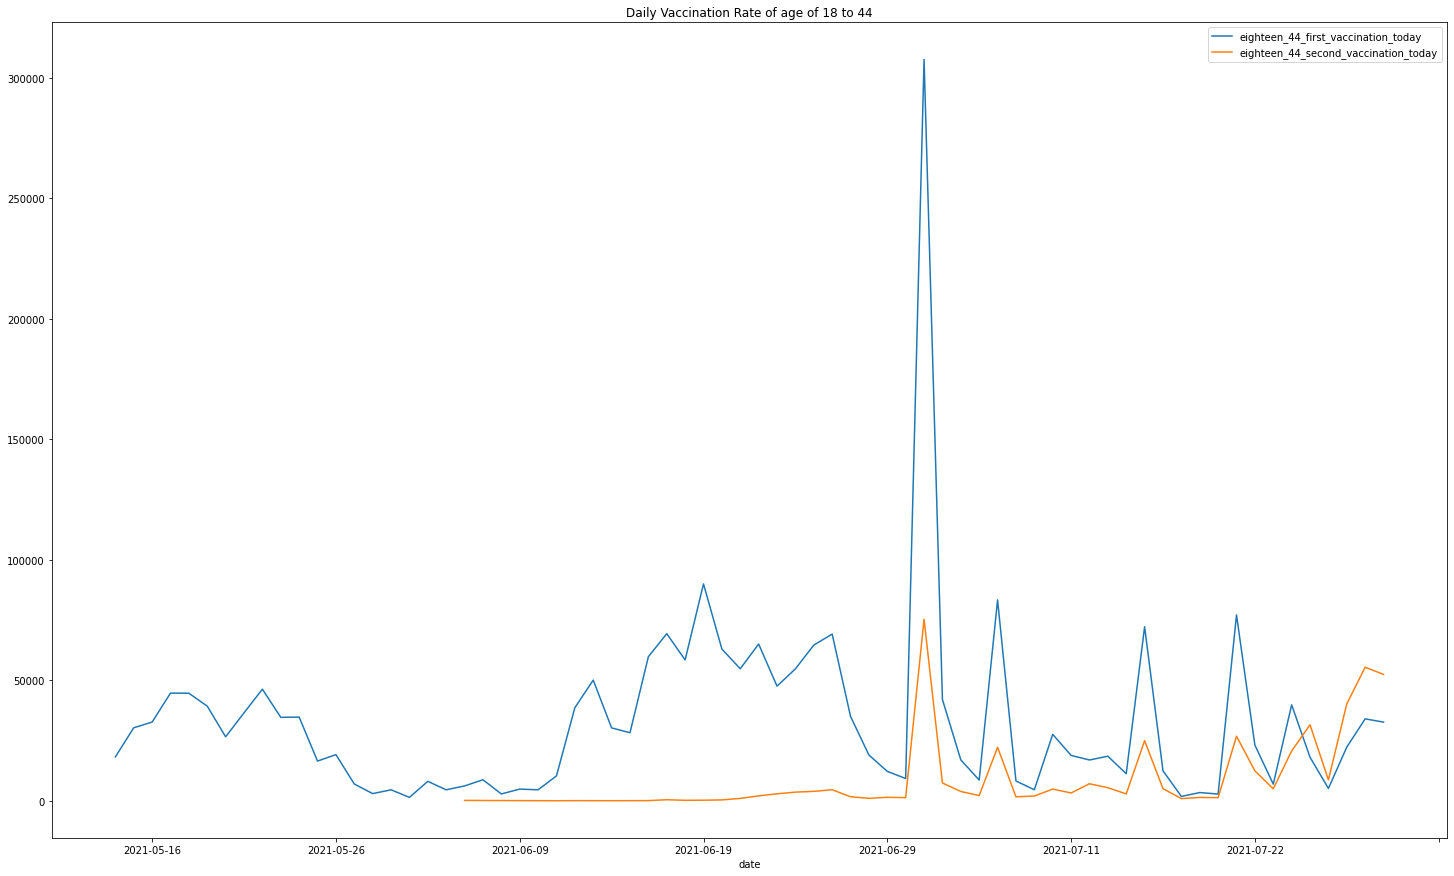

In [17]:
# vaccinations using available data
vaccines.plot(x="date",y=['eighteen_44_first_vaccination_today','eighteen_44_second_vaccination_today'],title="Daily Vaccination Rate of age of 18 to 44")

# Pre-requisites:

1. The data on which analysis was done starts from June 2020 to January 2022 in most cases.

# Summary of Part-1 Analysis:

**PHASE-1**: **JUNE2020 to DECEMBER2020**

1. From **Graph1 and Graph2** we can see that the active cases from September 2020 till December 2020 was decreasing.
2. The fatalities increased even the cases were decreasing, the possible reasons may be **Vaccinations are not done to the common people, lack of oxygen cylinders, Proper Medicines and different fungus resulted in increase in deaths**
3. **NOTE**: From the data available it is not possible to accurately measure the contribution by these above written factors accurately, but the major events happened during this period does makes the domain small and more precise where we can look for causes of this aftermath after First-Wave.

**PHASE-2**: **JANUARY-2021 to SEPTEMBER-2021:**

1. From all the graphs and data points it is quite clear that we saw a stable environment in Punjab between **January-2020 till end of March-2021**.
2. The Second wave started from late march 2021, again there was a hike in mass gathering for festivals like Holi and people travelling for a vaction.
3. Festivals and travelling are not the only contributers, poor vaccination rate that we can see in **Graph5,Graph6** during this phase helped deta-variant to create a havoc in the city.
4. The Inverted cone spike in **Graph2** shows massive explosion of the virus in the city.
5. The fatalities increased with the cases during Delta Variant, the possible reasons may be **Vaccinations are not done Properly, scarcity of oxygen cylinders, Proper Medicines and different fungus resulted in constant increase in deaths**


# PART-2 ANALYSIS:

# DIVIDING THE DATASET INTO TWO SUBCATOGRIES

1. days where cases are increasing
2. days where cases are decreasing

In [18]:
increase=pb_cases[pb_cases["rise in cases"]>0]
decrease=pb_cases[pb_cases["rise in cases"]<0]

increase

,date,samples_total,samples_new,tests_new,cases_total,isolation,discharged_total,active_cases,deaths_total,oxygen_support_active_patients,...,eighteen_44_first_vaccination_today,eighteen_44_first_vaccination_total,eighteen_44_second_vaccination_today,eighteen_44_second_vaccination_total,first_vaccination_today,second_vaccination_today,total_vaccination_today,month,year,rise in cases
0,2021-07-24,11877764,39745.0,39240.0,NaN,NaN,581712,771.0,16258,89,...,39799.0,2509560.0,20667.0,184790.0,113504.0,113504.0,113504.0,July2021,2021,8.0
1,2021-07-23,11838018,45783.0,39892.0,NaN,NaN,581634,768.0,16256,96,...,6907.0,2469761.0,4961.0,164123.0,19833.0,19833.0,19833.0,July2021,2021,23.0
4,2021-07-20,11720116,42390.0,34680.0,NaN,NaN,581312,899.0,16244,112,...,2785.0,2362643.0,1285.0,119957.0,7530.0,7530.0,7530.0,July2021,2021,8.0
5,2021-07-19,11677723,23256.0,31353.0,NaN,NaN,581197,953.0,16237,125,...,3409.0,2359858.0,1381.0,118672.0,9838.0,9838.0,9838.0,July2021,2021,31.0
8,2021-07-16,11567826,43246.0,43057.0,NaN,NaN,580677,1238.0,16215,162,...,72209.0,2342202.0,24933.0,111351.0,168818.0,168818.0,168818.0,July2021,2021,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2020-07-03,324054,NaN,NaN,NaN,1514.0,4266,NaN,157,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July2020,2020,40.0
326,2020-07-01,308998,NaN,NaN,NaN,1530.0,3989,NaN,149,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July2020,2020,31.0
330,2020-06-24,260857,NaN,NaN,NaN,1415.0,3099,NaN,113,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June2020,2020,33.0
333,2022-01-04,16882174,16056.0,15822.0,NaN,NaN,587588,2686.0,16653,54,...,33986.0,9246376.0,55415.0,5082335.0,135069.0,135069.0,135069.0,January2022,2022,19.0


In [19]:
decrease

,date,samples_total,samples_new,tests_new,cases_total,isolation,discharged_total,active_cases,deaths_total,oxygen_support_active_patients,...,eighteen_44_first_vaccination_today,eighteen_44_first_vaccination_total,eighteen_44_second_vaccination_today,eighteen_44_second_vaccination_total,first_vaccination_today,second_vaccination_today,total_vaccination_today,month,year,rise in cases
2,2021-07-22,11792233,31523.0,36839.0,NaN,NaN,581529,811.0,16250,101,...,23094.0,2462854.0,12421.0,159162.0,60203.0,60203.0,60203.0,July2021,2021,-29.0
3,2021-07-21,11760706,40590.0,40222.0,NaN,NaN,581406,869.0,16246,102,...,77117.0,2439760.0,26784.0,146741.0,183299.0,183299.0,183299.0,July2021,2021,-7.0
6,2021-07-18,11654465,43086.0,42341.0,NaN,NaN,581055,1046.0,16233,136,...,1802.0,2356449.0,900.0,117291.0,3824.0,3824.0,3824.0,July2021,2021,-16.0
7,2021-07-17,11611376,43545.0,43963.0,NaN,NaN,580871,1153.0,16224,149,...,12445.0,2354647.0,5040.0,116391.0,32637.0,32637.0,32637.0,July2021,2021,-28.0
9,2021-07-15,11524579,38833.0,38438.0,NaN,NaN,580483,1332.0,16212,194,...,11222.0,2269993.0,2846.0,86418.0,21622.0,21622.0,21622.0,July2021,2021,-60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2020-06-25,269037,NaN,NaN,NaN,1457.0,3192,NaN,120,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June2020,2020,-1509.0
331,2020-06-22,246760,NaN,NaN,NaN,1309.0,2825,NaN,101,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June2020,2020,-53.0
332,2022-01-05,16905814,23640.0,22794.0,NaN,NaN,587632,4434.0,16657,53,...,32638.0,9101226.0,52427.0,4262055.0,126108.0,126108.0,126108.0,January2022,2022,-84.0
334,2022-01-03,16866118,9470.0,9384.0,NaN,NaN,587530,1741.0,16651,50,...,22256.0,9212390.0,40197.0,5026920.0,91404.0,91404.0,91404.0,January2022,2022,-18.0


NUMBER OF DAYS WHERE PUNJAB WITNESSED RISE IN CASE

In [20]:
print("NUMBER OF DAYS WHERE PUNJAB WITNESSED RISE IN CASE: ",len(increase["date"].unique()))

NUMBER OF DAYS WHERE PUNJAB WITNESSED RISE IN CASE:  148


NUMBER OF DAYS WHERE NEW POSITIVE CASES WERE LESS THAN RECOVERED CASE

In [21]:
print("NUMBER OF DAYS WHERE NEW POSITIVE CASES WERE LESS THAN NUMBER OF RECOVERED PATIENTS : ",len(decrease["date"].unique()))

NUMBER OF DAYS WHERE NEW POSITIVE CASES WERE LESS THAN NUMBER OF RECOVERED PATIENTS :  187


**ANALYSIS WHEN CASES WERE INCREASING**

In [22]:
df_mean=increase.groupby(["month"],dropna=True).mean()
df_mean.drop(columns=['samples_total','cases_total','isolation','discharged_total','deaths_total','above_45_second_vaccinattion_total','eighteen_44_first_vaccination_total','eighteen_44_second_vaccination_total'],inplace=True)
df_mean.drop(columns=['oxygen_support_active_patients','critical_care_active_patients','ventilator_support_active_patients','healthcare_first_vaccination_total','frontline_second_vaccination_total','above_45_first_vaccination_total','total_vaccination_today'],inplace=True)
df_mean.drop(columns=['frontline_first_vaccination_total','healthcare_second_vaccination_total'],inplace=True)
df_mean

,samples_new,tests_new,active_cases,healthcare_first_vaccination_today,frontline_first_vaccination_today,healthcare_second_vaccination_today,frontline_second_vaccination_today,above_45_first_vaccination_today,above_45_second_vaccination_today,eighteen_44_first_vaccination_today,eighteen_44_second_vaccination_today,first_vaccination_today,second_vaccination_today,rise in cases
month,,,,,,,,,,,,,,
April2021,44762.555556,46884.000000,38079.000000,11977.555556,11977.555556,3028.222222,3028.222222,59292.888889,8407.111111,NaN,NaN,87581.714286,87581.714286,18.111111
August2020,19537.428571,NaN,11444.384615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.923077
December2020,23524.500000,NaN,6482.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.285714
February2021,16623.222222,19464.888889,2771.555556,3248.750000,3248.750000,3547.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.222222
January2021,17173.500000,17890.000000,2630.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.300000
January2022,15095.000000,14842.000000,2027.500000,33.500000,104.000000,58.500000,197.000000,8322.500000,14937.000000,19551.000000,32049.000000,79510.500000,79510.500000,18.500000
July2020,NaN,NaN,3049.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.923077
July2021,41365.444444,40519.888889,1344.444444,1303.222222,1303.222222,1354.555556,1354.555556,26664.777778,25062.666667,61485.777778,17711.777778,133582.777778,133582.777778,18.555556
June2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000


In [23]:
df1=increase.groupby(["month"],dropna=True).mean()
df1["Index"]=df1.index.values.copy()
df1["Index"]=df1["Index"].apply(lambda x:set_index(x))
df1.sort_values(["Index"],inplace=True)
df1.dropna(axis=1, how='all',inplace=True)

**Graph9 and Graph10 below**

DESCRIPTION: The graph below is showing monthly **Average rise in cases.**

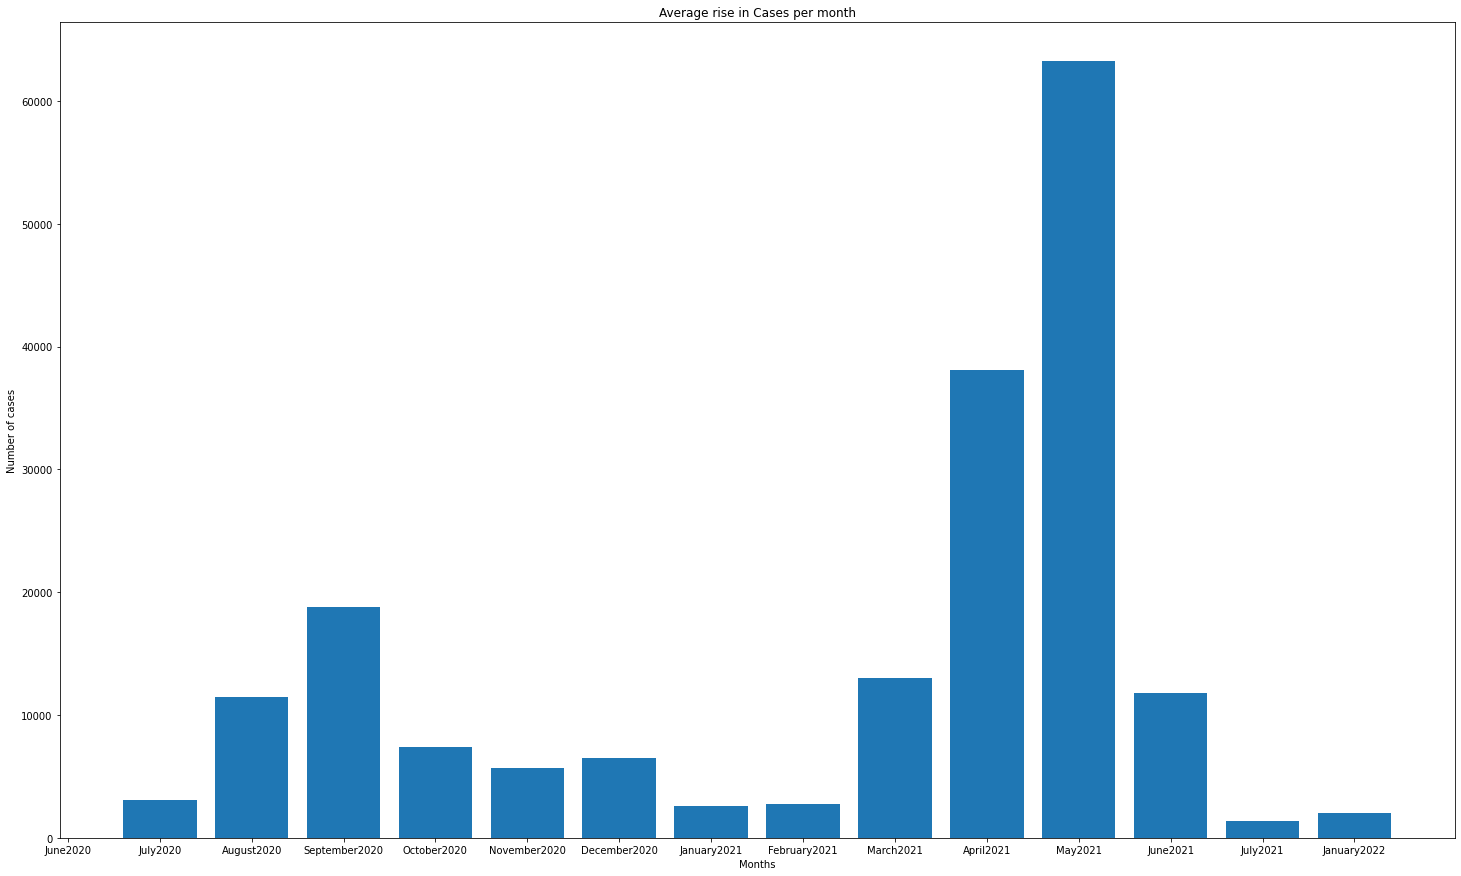

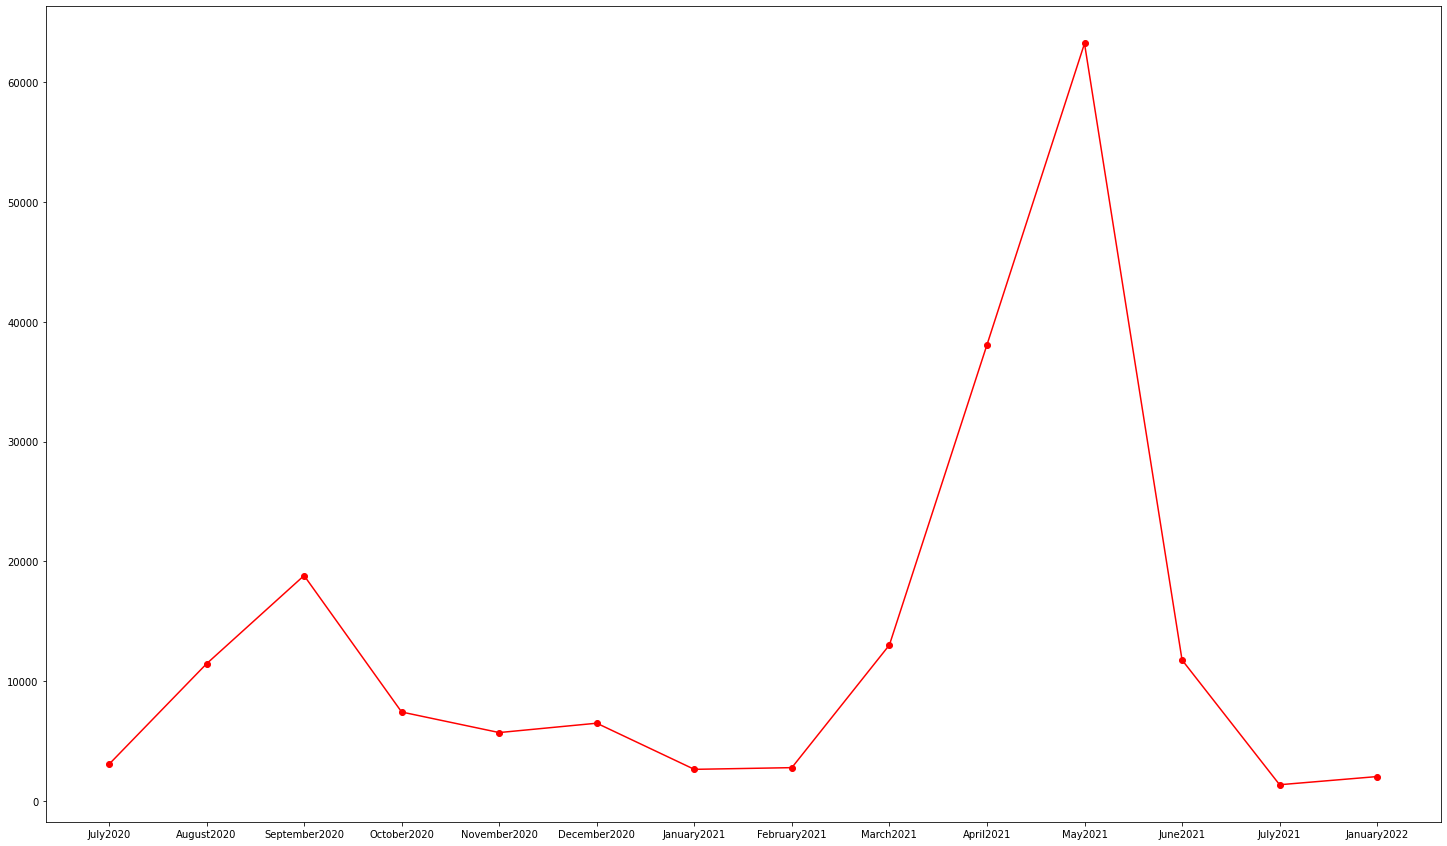

In [24]:
bar_graph(df1.index.values,df1["active_cases"],"Months","Number of cases","Average rise in Cases per month")
plt.plot(df1.index.values,df1["active_cases"].values,color='red', marker='o', linestyle='-')

**ANALYSIS WHEN CASES WERE DECREASING**

In [25]:
df1_mean=decrease.groupby(["month"],dropna=True).mean()
df1_mean.drop(columns=['samples_total','cases_total','isolation','discharged_total','deaths_total','above_45_second_vaccinattion_total','eighteen_44_first_vaccination_total','eighteen_44_second_vaccination_total'],inplace=True)
df1_mean.drop(columns=['oxygen_support_active_patients','critical_care_active_patients','ventilator_support_active_patients','healthcare_first_vaccination_total','frontline_second_vaccination_total','above_45_first_vaccination_total','total_vaccination_today'],inplace=True)
df1_mean.drop(columns=['frontline_first_vaccination_total','healthcare_second_vaccination_total'],inplace=True)
df1_mean

,samples_new,tests_new,active_cases,healthcare_first_vaccination_today,frontline_first_vaccination_today,healthcare_second_vaccination_today,frontline_second_vaccination_today,above_45_first_vaccination_today,above_45_second_vaccination_today,eighteen_44_first_vaccination_today,eighteen_44_second_vaccination_today,first_vaccination_today,second_vaccination_today,rise in cases
month,,,,,,,,,,,,,,
April2021,41752.727273,46543.909091,35246.818182,9535.454545,9535.454545,2679.909091,2679.909091,65890.818182,7435.363636,NaN,NaN,80905.500000,80905.500000,-84.181818
August2020,20652.500000,NaN,10477.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-111.875000
December2020,22663.846154,NaN,6122.615385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.692308
February2021,19613.066667,18982.066667,2654.266667,3818.250000,3818.250000,1747.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-77.466667
January2021,20128.000000,15985.600000,2566.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.153846
January2022,16615.333333,16207.000000,2405.333333,5.333333,28.666667,60.000000,168.666667,9417.666667,16573.000000,24322.000000,41380.666667,95319.333333,95319.333333,-36.666667
July2020,NaN,NaN,2911.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-144.692308
July2021,40230.166667,39834.333333,1542.083333,564.416667,564.416667,581.666667,581.666667,9157.083333,10327.083333,20876.333333,6408.916667,47915.333333,47915.333333,-16.250000
June2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-396.250000


In [26]:
df2=decrease.groupby(["month"],dropna=True).mean()
df2["Index"]=df2.index.values.copy()
df2["Index"]=df2["Index"].apply(lambda x:set_index(x))
df2.sort_values(["Index"],inplace=True)
df2.dropna(axis=1, how='all',inplace=True)
df2["fall in cases"]=-1*df2["rise in cases"]
df2.drop(["rise in cases"],axis="columns",inplace=True)
# df2

In [27]:
pb_cases['death_today']= ""
pb_cases['death_today'] = pb_cases['deaths_total'].diff(-1)
pb_cases_death = pd.DataFrame()
pb_cases_death['month'] = pb_cases['month'].copy()
pb_cases_death['active_cases'] = pb_cases['active_cases'].copy()
pb_cases_death['no_of_deaths_today'] = pb_cases['death_today'].copy()
pb_cases_death['critical_care_active_patients'] = pb_cases['critical_care_active_patients'].copy()
pb_cases_death['oxygen_support_active_patients'] = pb_cases['oxygen_support_active_patients'].copy()
pb_cases_death['ventilator_support_active_patients'] = pb_cases['ventilator_support_active_patients'].copy()
pb_cases_deaths =pb_cases_death.groupby(["month"]).sum()
pb_cases_deaths.drop(['June2020'],inplace=True)
pb_cases_deaths["Index"]=pb_cases_deaths.index.values.copy()
pb_cases_deaths["Index"]=pb_cases_deaths["Index"].apply(lambda x:set_index(x))
pb_cases_deaths.sort_values(["Index"],inplace=True)
pb_cases_deaths.drop(columns=['Index'],inplace=True)
pb_cases_deaths["critical_care__per_active_cases"] = pb_cases_deaths["critical_care_active_patients"]/pb_cases_deaths["active_cases"]
pb_cases_deaths["oxygen_support_per_active_cases"] = pb_cases_deaths["oxygen_support_active_patients"].div(pb_cases_deaths["active_cases"].values)
pb_cases_deaths["ventilator_support_per_active_cases"] = pb_cases_deaths["ventilator_support_active_patients"].div(pb_cases_deaths["active_cases"].values)
pb_cases_deaths

,active_cases,no_of_deaths_today,critical_care_active_patients,oxygen_support_active_patients,ventilator_support_active_patients,critical_care__per_active_cases,oxygen_support_per_active_cases,ventilator_support_per_active_cases
month,,,,,,,,
July2020,62513.0,248.0,0.0,1597,239,0.000000,0.025547,0.003823
August2020,316416.0,1067.0,0.0,7908,1101,0.000000,0.024992,0.003480
September2020,494513.0,1953.0,0.0,12375,1896,0.000000,0.025025,0.003834
October2020,200814.0,797.0,0.0,4583,868,0.000000,0.022822,0.004322
November2020,141566.0,604.0,0.0,3307,341,0.000000,0.023360,0.002409
December2020,170349.0,534.0,0.0,3299,395,0.000000,0.019366,0.002319
January2021,59665.0,274.0,0.0,1925,205,0.000000,0.032263,0.003436
February2021,64758.0,217.0,0.0,1975,200,0.000000,0.030498,0.003088
March2021,350628.0,1036.0,0.0,5680,581,0.000000,0.016200,0.001657


**Graph11 below**

DESCRIPTION: The graph below is showing monthly **Number of Deaths per month.**

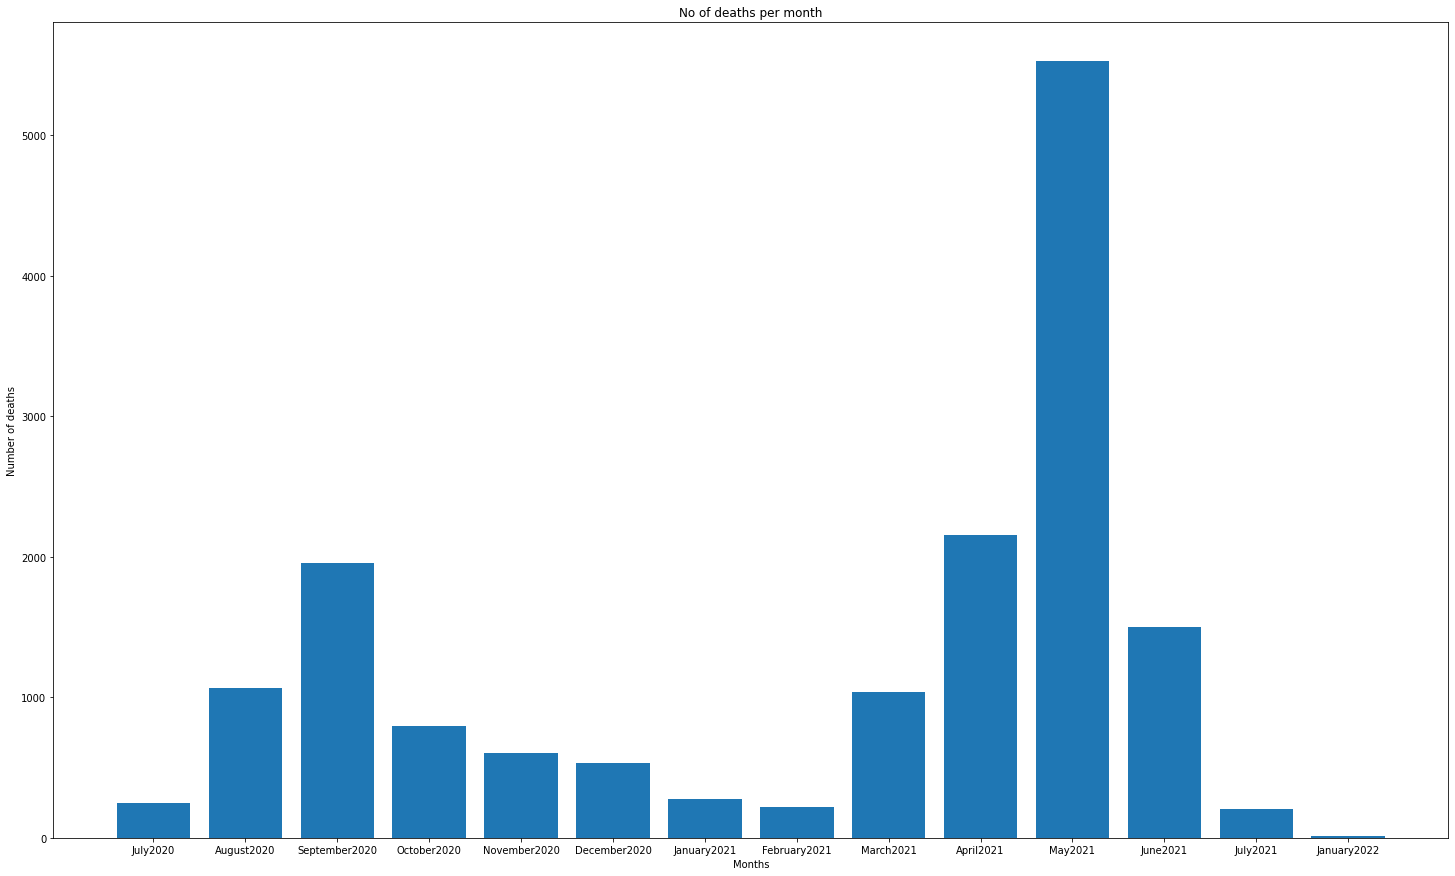

In [28]:
bar_graph(pb_cases_deaths.index.values,pb_cases_deaths["no_of_deaths_today"],"Months","Number of deaths","No of deaths per month")

**Graph12**

DESCRIPTION: The graph below is showing per percentage active cases with **Critical care, Oxygen Support and Ventilator Support**

Properties of graph:
1. Blue bar is for percentage of people in critical state with repect to active cases.
2. Orange bar is for percentage of people who need oxygen support with repect to active cases.
3. Green bar is for percentage of people in who need ventilator support with repect to active cases

<AxesSubplot:xlabel='month'>

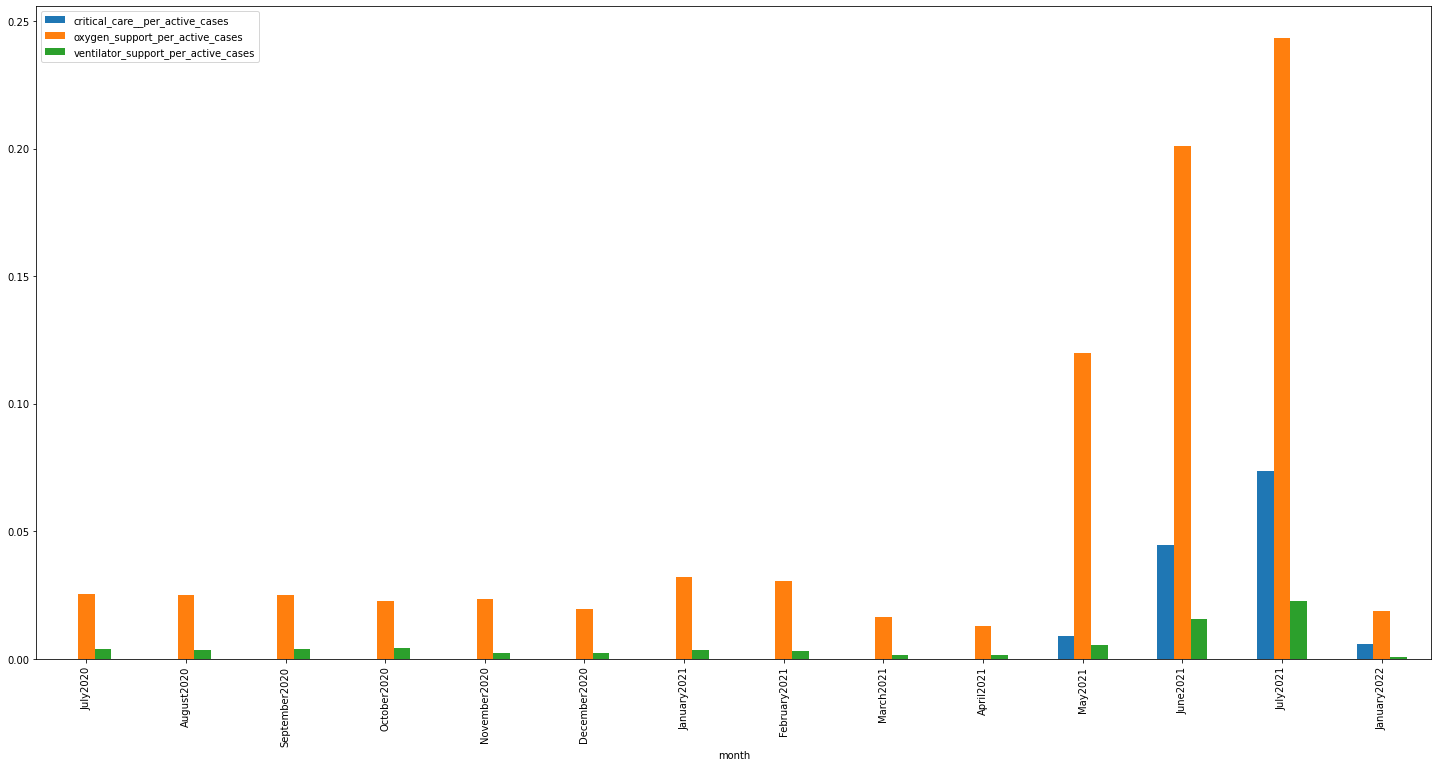

In [29]:
pb_cases_deaths[["critical_care__per_active_cases","oxygen_support_per_active_cases","ventilator_support_per_active_cases"]].plot(kind="bar",figsize=(25,12))

In [30]:
compare=pd.DataFrame()
compare['increase_tests'] = ""
compare['increase_tests'] = df_mean['tests_new'].copy()
compare['decrease_tests'] = ""
compare['decrease_tests'] = df1_mean['tests_new'].copy()
compare.dropna(inplace=True)
compare["Index"]=compare.index.values.copy()
compare["Index"]=compare["Index"].apply(lambda x:set_index(x))
compare.sort_values(["Index"],inplace=True)
compare.drop(columns=['Index'],inplace=True)
# compare

**Graph13**

DESCRIPTION:The graph below shows the comparision between **number of test condcuted** when **cases were increasing** V/S when **cases were decreasing.**

<AxesSubplot:xlabel='month'>

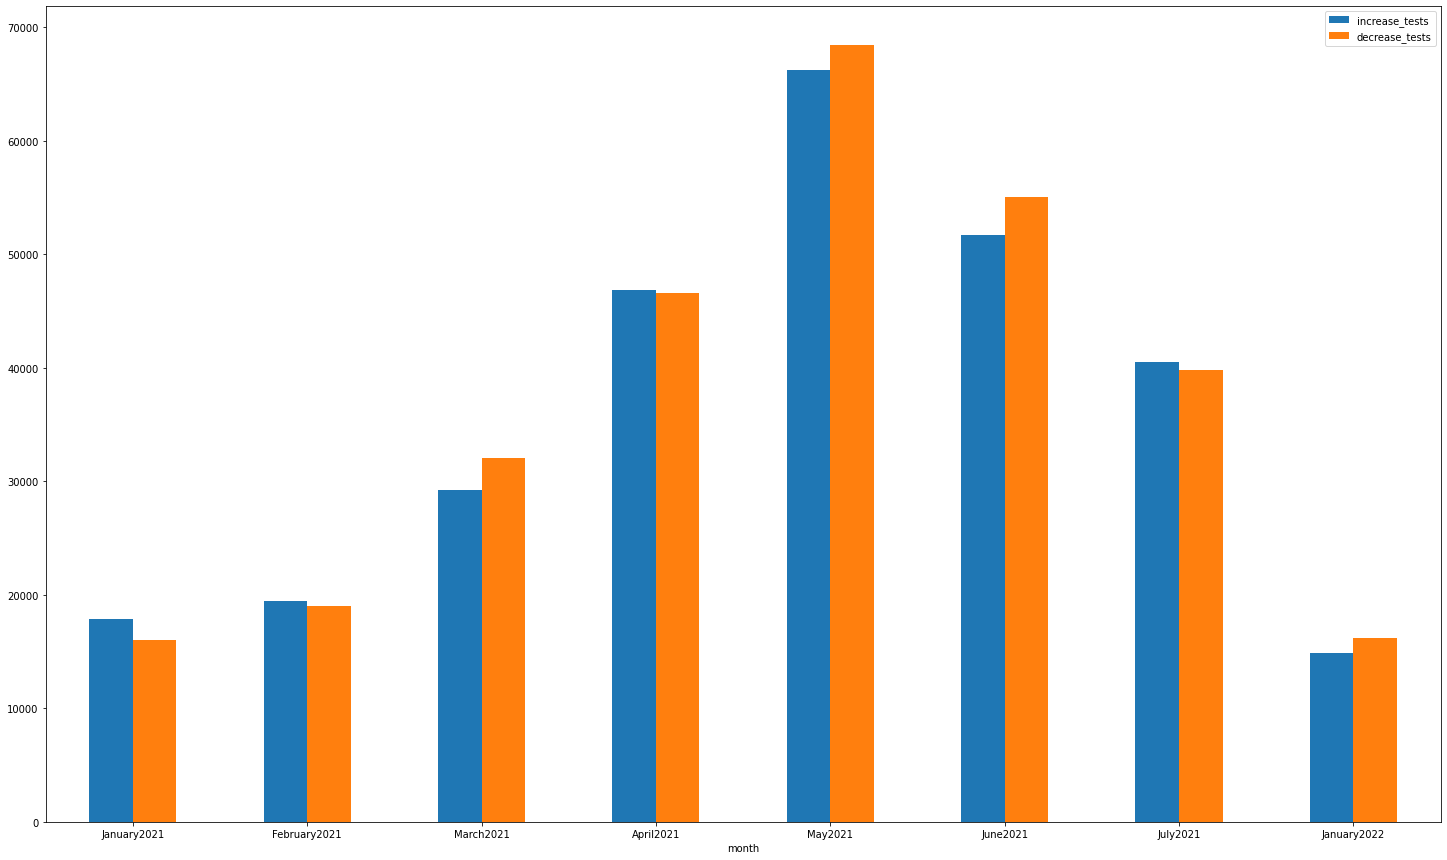

In [31]:
# compare.plot(x=compare.index.values,y=['increase_tests','decrease_tests'],kind='bar')
compare.plot.bar(rot=0,figsize=(25,15))

# PRE-REQUISITES:
1. Please note that in this part of analysis most of of the data points are between January-2021 and January 2022.

# SUMMARY OF PART-2 ANALYSIS:

1. **WHEN CASES WERE INCREASING:**

    1. **Graph9 and Graph10** shows the start of second wave from March 2021, where there is a big hike in rise in cases, this could be due to many reason and some of them are: revenge vacation, mass gatherng of people during long festive season.
    2. **The steep rise in cases Shows that the Second-Wave is very high in terms of new positive cases, fatility rate and hospitalisation will be more compared to first wave, as it is noted that from graphs (*Graph9, Graph10*) that the there is high increase in major change in number of hospitalisation or in fatality trend even after there is sudden rise in cases.The main reason for could be "Delta" variant heavy gatherings, not following protocols **



2. **WHEN CASES WERE DECREASING:**
    1. There was a big fall in cases during May 2021, this indicates that Punjab showed the first big fall in cases after one month of second-wave. May 2021 was a crucial month for people in Punjab as it also showed considerable less death rate compared April-2021.  

3. **Hospitalization Needs:**
    1. **Graph12** clearly shows that the rise in needs of ventilators, oxygen supports and critical conditions. The possible reasons will be **Due to lack of preparation for second wave , scarcity of ventilations beds, lack of hospital equipments, poorly conducted vaccination drives**

In [32]:
muco = pd.read_csv('PB_mucormycosis_cases.csv')
muco.drop(muco[muco['new_cases'] == 0].index,inplace=True)
muco.sort_values('date',ascending=False,inplace=True)
mucomy = muco.head(1)
# mucomy


In [33]:
muco["month"]=muco["date"].copy()
muco["month"]=muco["month"].apply(lambda x:get_month(x))
muco_districts_mean = muco.groupby('month').mean()
muco_districts_mean["Index"]=muco_districts_mean.index.values.copy()
muco_districts_mean["Index"]=muco_districts_mean["Index"].apply(lambda x:set_index(x))
muco_districts_mean.sort_values(["Index"],inplace=True)
# muco_districts_mean

**Graph14**

DESCRIPTION:The graph below shows **Average number of mucormycosis cases** per day.

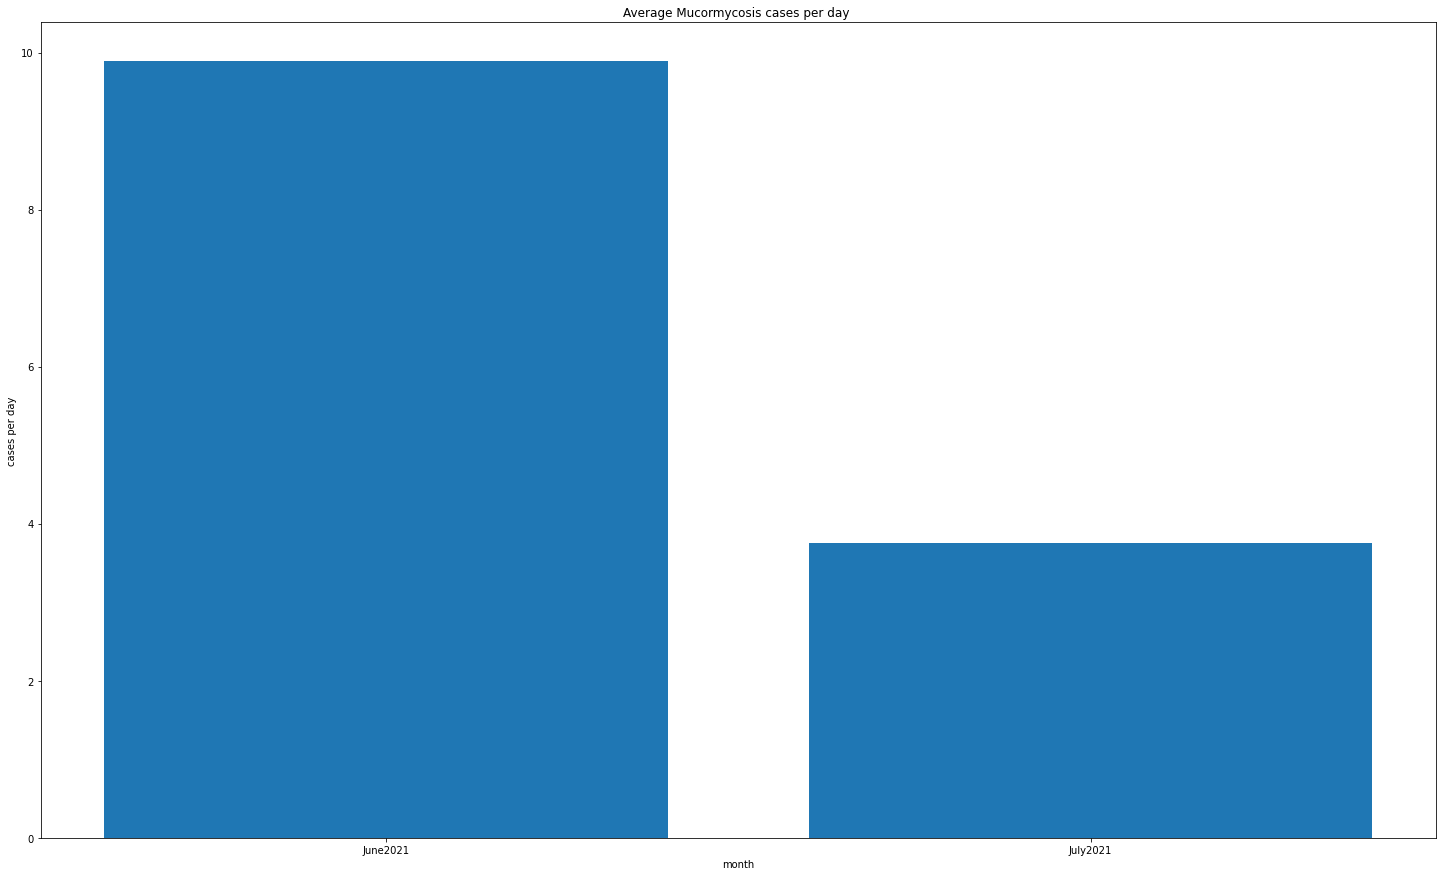

In [34]:
bar_graph(muco_districts_mean.index.values,muco_districts_mean['new_cases'].values,"month","cases per day","Average Mucormycosis cases per day ")

**Graph15**

DESCRIPTION:The graph below shows **Recovery rate of mucormycosis** cases per day.

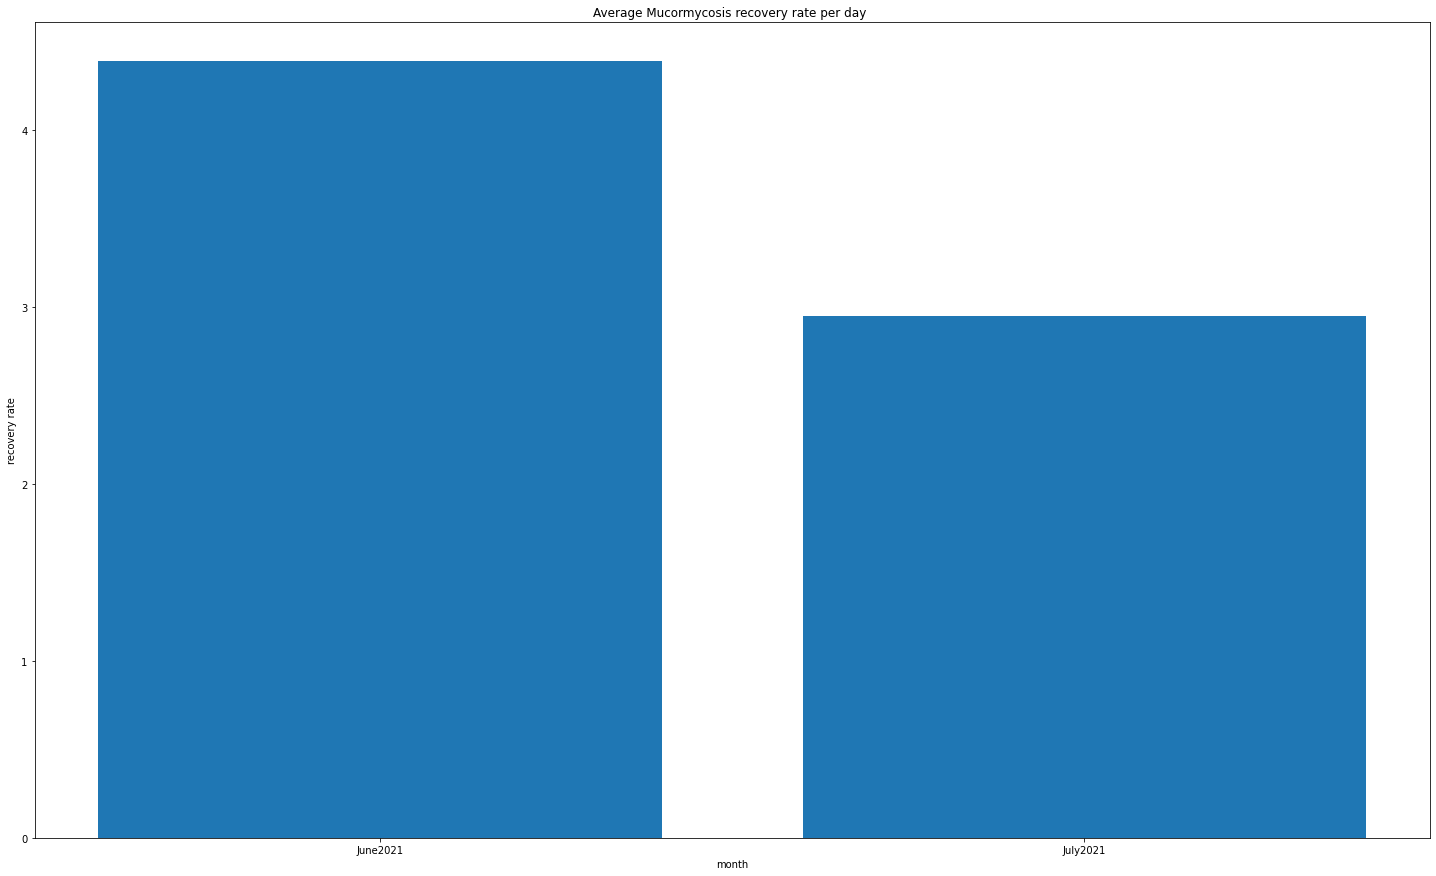

In [35]:
bar_graph(muco_districts_mean.index.values,muco_districts_mean['cured_today'].values,"month","recovery rate","Average Mucormycosis recovery rate per day ")

**Graph16**

DESCRIPTION:The graph below shows the comparision between **Average cases belongs to punjab** V/S **Other States cases in Punjab**

1. Blue Bar --> shows the cases who belongs to punjab state.
2. Orange Bar --> shows the cases who doesn't belongs to punjab but are treated here.

<AxesSubplot:title={'center':'Average cases belongs to punjab and other states'}, xlabel='month'>

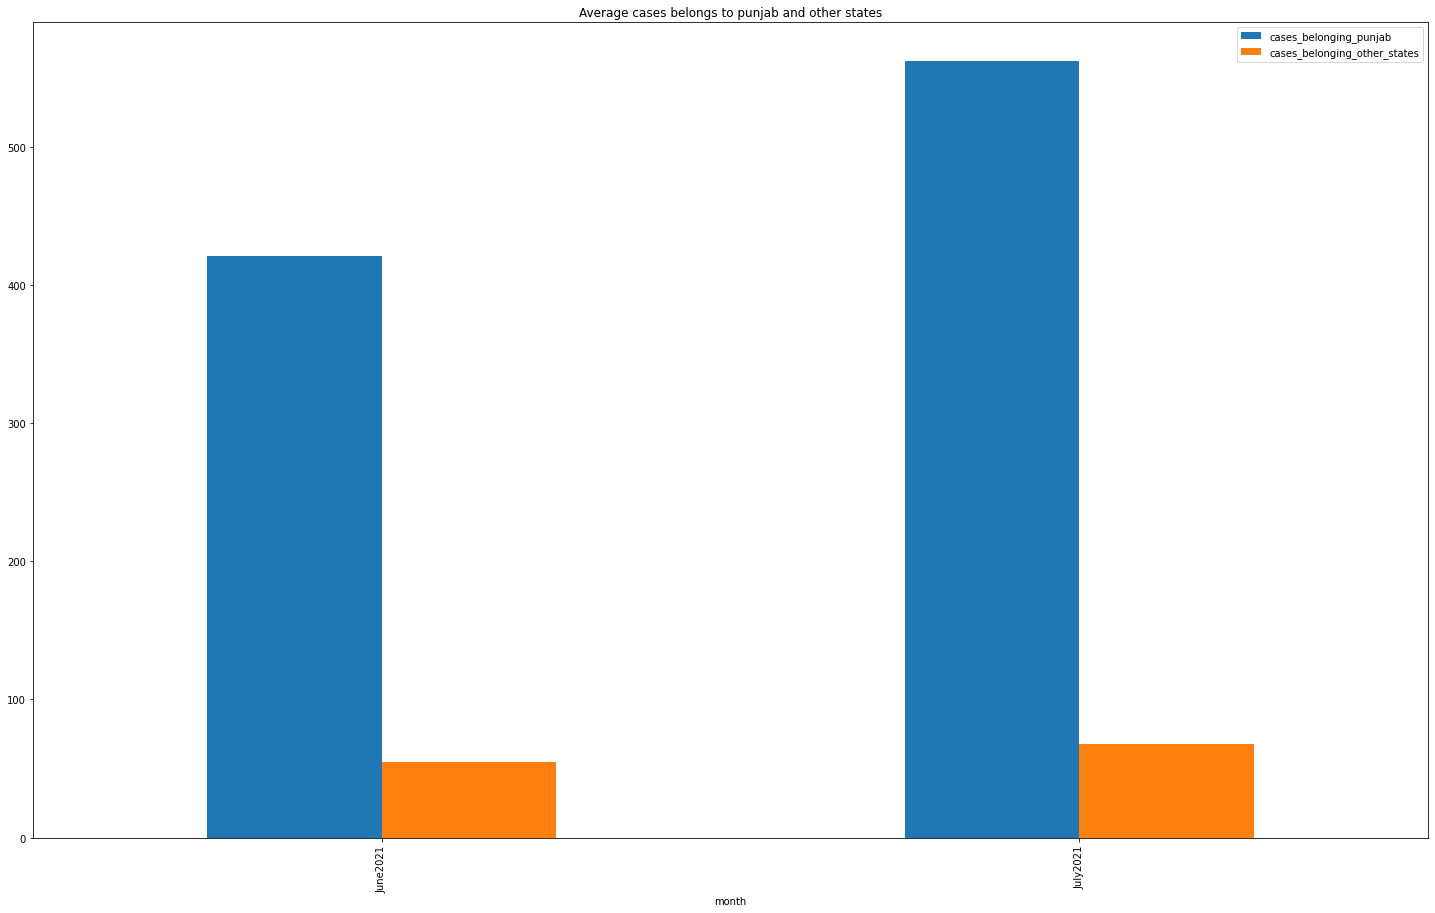

In [36]:
# bar_graph(muco_districts_mean.index.values,muco_districts_mean[['cases_belonging_punjab','cases_belonging_other_states']].values,"Month","Average New cases per each day","Averge cases per day in each month")
muco_districts_mean[["cases_belonging_punjab","cases_belonging_other_states"]].plot(kind="bar",figsize=(25,15),title="Average cases belongs to punjab and other states")

**Graph17**

DESCRIPTION:The graph below shows the comparision between **Average deaths belongs to punjab** V/S **Other States cases in Punjab**

1. Blue Bar --> shows the deaths who belongs to punjab state
2. Orange Bar --> shows the deaths who doesn't belongs to punjab but are treated here.

<AxesSubplot:title={'center':'Average deaths belongs to punjab and other states'}, xlabel='month'>

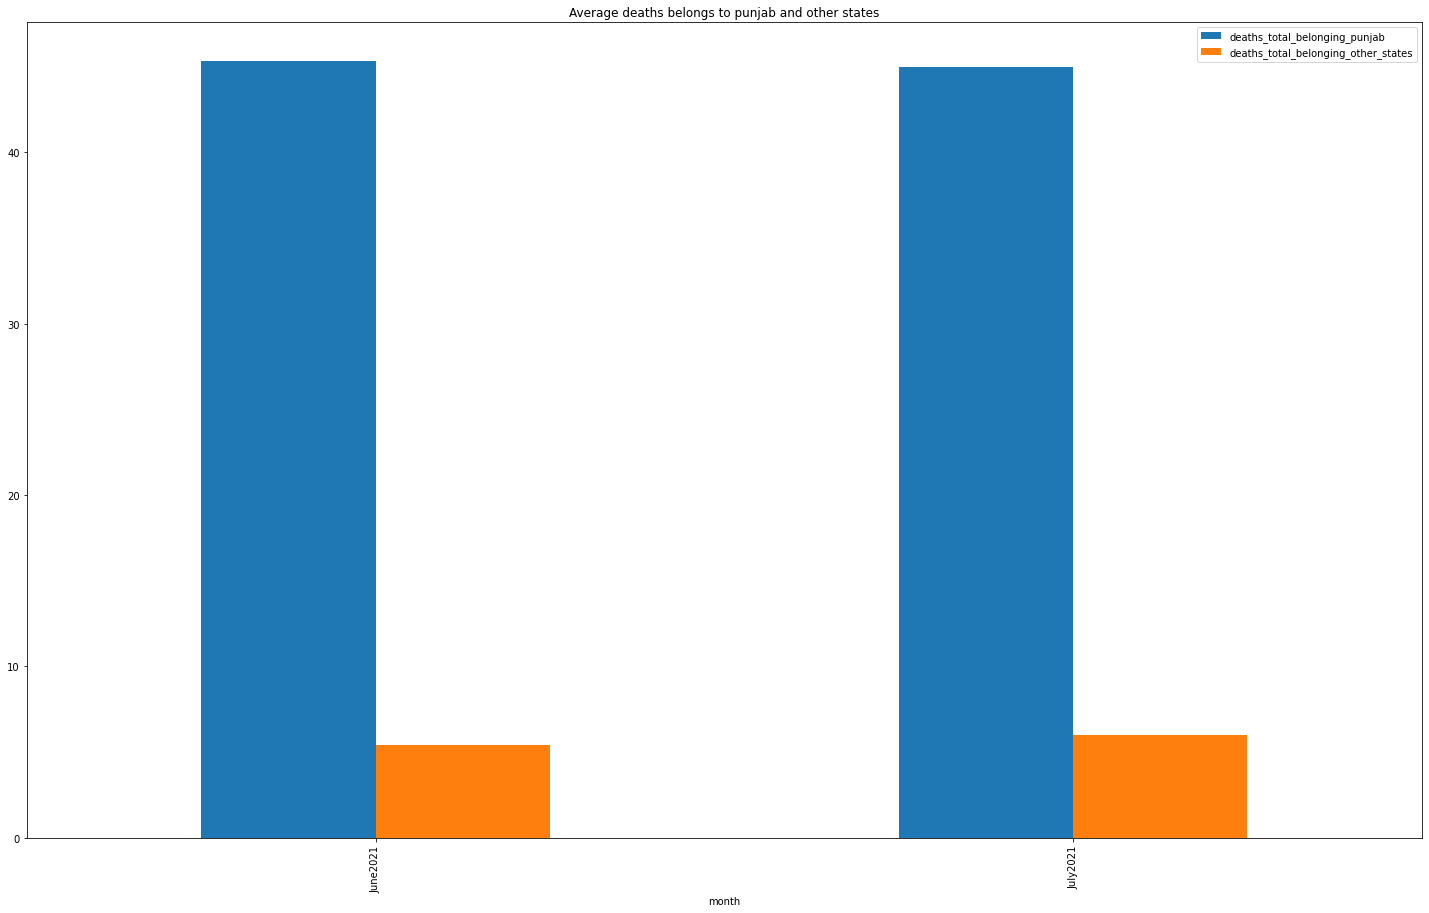

In [37]:
muco_districts_mean[["deaths_total_belonging_punjab","deaths_total_belonging_other_states"]].plot(kind="bar",figsize=(25,15),title="Average deaths belongs to punjab and other states")

**Graph18**

DESCRIPTION:The graph below shows the comparision between **LAMA cases belongs to punjab** V/S **Other States people in Punjab**

1. Blue Bar --> shows the people who **left aganist medical advice** belongs to punjab state
2. Orange Bar --> shows the people who **left aganist medical advice** doesn't belongs to punjab but are treated here.

<AxesSubplot:title={'center':'LAMA cases'}, xlabel='month'>

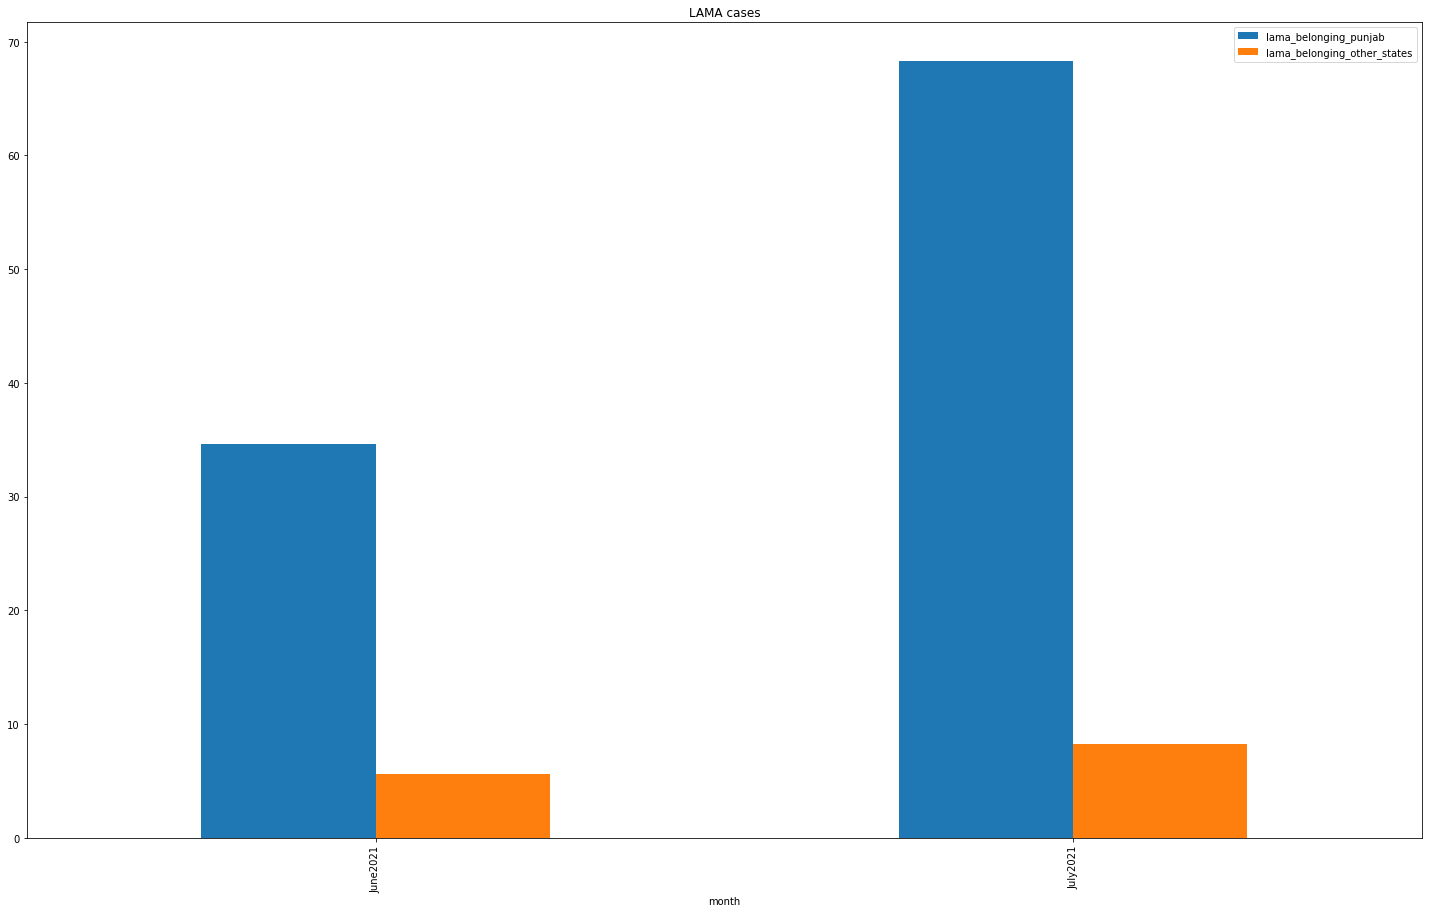

In [38]:
muco_districts_mean[["lama_belonging_punjab","lama_belonging_other_states"]].plot(kind="bar",figsize=(25,15),title="LAMA cases")

# Pre-requisites:

1. The data on which analysis was done is in months of June2021 and July2021

# Summary of Part-2 Analysis:

1. From **Graph14 and Graph15** we can see that the cases were more during last phase of second wave and slowly went down. also the recovery rate is good as compared with the cases
2. From **Graph16 and Graph17** we have compared the cases which belongs to punjab and which cases from other states who were in punjab. Here the death rate is high as compared to the other states who are in punjab.
3. From **Graph18 LAMA means Leave Aganist Medical Advice**,people who leave hospitals aganist medical advices. These are a bit dangerous to their health. We can see many people from punjab left aganist medical advices. 


## PREDICTION MODEL

In [39]:
district_cases

,date,district,cases_today,percentage_tests_positive,outside_source_details,case_details,remarks,cases_total,active_cases,recovered_total,deaths_total
0,2021-07-25,sas nagar,9.0,0.98,NaN,9 new cases,NaN,68437.0,41.0,67339.0,1057.0
1,2021-07-25,amritsar,8.0,0.26,NaN,8 new cases,NaN,47039.0,49.0,45406.0,1584.0
2,2021-07-25,bathinda,7.0,0.68,NaN,7 new cases,NaN,41492.0,72.0,40381.0,1039.0
3,2021-07-25,hoshiarpur,7.0,0.34,NaN,"2 contact of positive case, 5 new cases",NaN,30632.0,43.0,29614.0,975.0
4,2021-07-25,patiala,6.0,0.28,NaN,6 new cases,NaN,48686.0,36.0,47313.0,1337.0
...,...,...,...,...,...,...,...,...,...,...,...
8345,2022-01-01,faridkot,0.0,0.00,NaN,NaN,331 samplestested,13964.0,5.0,13639.0,320.0
8346,2022-01-01,mansa,0.0,0.00,NaN,NaN,121 samplestested,15612.0,2.0,15229.0,381.0
8347,2022-01-01,ropar,0.0,0.00,NaN,NaN,246 samplestested,13016.0,7.0,12581.0,428.0
8348,2022-01-01,on the daypunjab,332.0,2.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
pred_data=district_cases[district_cases["district"]=="total"]
pred_data["date"]=pred_data["date"].apply(lambda x: rearrange_date(x))


C:\Users\anura\AppData\Local\Temp/ipykernel_20420/3164335024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data["date"]=pred_data["date"].apply(lambda x: rearrange_date(x))


In [41]:
pred_data.drop(["district","cases_today","percentage_tests_positive","outside_source_details","case_details","remarks"],axis="columns",inplace=True)
pred_data

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,cases_total,active_cases,recovered_total,deaths_total
23,25-07-2021,598794.0,699.0,581829.0,16266.0
47,24-07-2021,598741.0,771.0,581712.0,16258.0
71,23-07-2021,598658.0,768.0,581634.0,16256.0
95,22-07-2021,598590.0,811.0,581529.0,16250.0
119,21-07-2021,598521.0,869.0,581406.0,16246.0
...,...,...,...,...,...
8253,05-01-2022,608723.0,4434.0,587632.0,16657.0
8277,04-01-2022,606927.0,2686.0,587588.0,16653.0
8301,03-01-2022,605922.0,1741.0,587530.0,16651.0
8325,02-01-2022,605509.0,1369.0,587492.0,16648.0


In [42]:
pred_data.reset_index(inplace=True)

In [43]:
pred_data.reset_index(inplace=True)

In [57]:
pred_data["Index"]=pred_data["date"].copy()
pred_data["Index"]=pred_data["Index"].apply(lambda x:order_by_date(x))
pred_data.sort_values(by="Index",inplace=True)

pred_data

C:\Users\anura\AppData\Local\Temp/ipykernel_20420/299983838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data["Index"]=pred_data["date"].copy()
C:\Users\anura\AppData\Local\Temp/ipykernel_20420/299983838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data["Index"]=pred_data["Index"].apply(lambda x:order_by_date(x))
C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,level_0,index,date,cases_total,active_cases,recovered_total,deaths_total,Index
293,293,6842,04-09-2020,60013.0,15731.0,42543.0,1739.0,20200904
292,292,6819,05-09-2020,61527.0,15870.0,43849.0,1808.0,20200905
291,291,6796,07-09-2020,65583.0,16640.0,47020.0,1923.0,20200907
290,290,6773,09-09-2020,69684.0,17065.0,50558.0,2061.0,20200909
289,289,6750,10-09-2020,72143.0,18088.0,51906.0,2149.0,20200910
...,...,...,...,...,...,...,...,...
298,298,8349,01-01-2022,605126.0,1041.0,587440.0,16645.0,20220101
297,297,8325,02-01-2022,605509.0,1369.0,587492.0,16648.0,20220102
296,296,8301,03-01-2022,605922.0,1741.0,587530.0,16651.0,20220103
295,295,8277,04-01-2022,606927.0,2686.0,587588.0,16653.0,20220104


In [55]:
# MULTIVARIABLE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

x=pred_data[["level_0","recovered_total","active_cases"]]
y=pred_data["cases_total"]
model = LinearRegression().fit(x, y)
accuracy=model.score(x,y)
print("Accuracy of Model is {}%".format(round(accuracy*100,2)))

Accuracy of Model is 100.0%


In [62]:
print(linear_correlation(pred_data["recovered_total"],pred_data["cases_total"]))
print(linear_correlation(pred_data["active_cases"],pred_data["cases_total"]))

0.9948819508105282
0.2905493019563593


In [56]:
# Source:https://www.business-standard.com/article/current-affairs/coronavirus-pandemic-22-more-deaths-in-punjab-and-5-136-cases-122012601160_1.html
# prediction as of 27th January.
x1=model.predict([[319,670642,40319]])
print("Predicted cumulative case:",round(x1[0],0))
print("Actual Value of cumulative case: 728042")

Predicted cumulative case: 728974.0
Actual Value of cumulative case: 728042


C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### DEATH PREDICTION

In [58]:
from sklearn.linear_model import LinearRegression

x=pred_data[["level_0","recovered_total","cases_total"]]
y=pred_data["deaths_total"]
model = LinearRegression().fit(x, y)
accuracy=model.score(x,y)
print("Accuracy of Model is {}%".format(round(accuracy*100,2)))

Accuracy of Model is 99.9%


Source:https://www.business-standard.com/article/current-affairs/coronavirus-pandemic-22-more-deaths-in-punjab-and-5-136-cases-122012601160_1.html

In [60]:
# prediction as of 27th January.

x1=model.predict([[319,670642,728042]])
print("Predicted cumulative deaths:",round(x1[0],0))
print("Actual Value of cumulative deaths: 17081")

Predicted cumulative deaths: 18017.0
Actual Value of cumulative deaths: 17081


C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
print(linear_correlation(pred_data["recovered_total"],pred_data["deaths_total"]))
print(linear_correlation(pred_data["cases_total"],pred_data["deaths_total"]))

0.999335638935366
0.9942181590777184
